<a href="https://colab.research.google.com/github/hpal007/ElectoralBondAnalysis/blob/main/electoral_bond_analysis_party.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip3 install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=f91b9e29d4004cff46ee8834abedc44365760c82a203d66b551ec759bf85f333
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [2]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate()

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:

df =(spark
     .read
     .format("csv")
     .option("header", True)
     .option("inferSchema",True)
     .load("/content/drive/MyDrive/pyspark-data/electrol_bond_pary.csv"))
df.show()


+-----------------+---------------------------+------------+
|Date ofEncashment|Name of the Political Party|Denomination|
+-----------------+---------------------------+------------+
|        12-Apr-19|       ALL INDIA ANNA DR...|   10,00,000|
|        12-Apr-19|       ALL INDIA ANNA DR...|   10,00,000|
|        12-Apr-19|       ALL INDIA ANNA DR...| 1,00,00,000|
|        12-Apr-19|       ALL INDIA ANNA DR...|   10,00,000|
|        12-Apr-19|       ALL INDIA ANNA DR...|   10,00,000|
|        12-Apr-19|       ALL INDIA ANNA DR...|   10,00,000|
|        12-Apr-19|       ALL INDIA ANNA DR...|   10,00,000|
|        12-Apr-19|       ALL INDIA ANNA DR...|   10,00,000|
|        12-Apr-19|       ALL INDIA ANNA DR...|   10,00,000|
|        12-Apr-19|       ALL INDIA ANNA DR...|   10,00,000|
|        12-Apr-19|       ALL INDIA ANNA DR...|   10,00,000|
|        12-Apr-19|       ALL INDIA ANNA DR...|   10,00,000|
|        12-Apr-19|       ALL INDIA ANNA DR...|   10,00,000|
|        12-Apr-19|     

In [37]:
df = df.withColumnRenamed("Date ofEncashment", "date_of_encashment") \
        .withColumnRenamed("Name of the Political Party", "party") \
        .withColumnRenamed("Denomination", "denomination")

In [18]:
df.columns

['date_of_encashment', 'party', 'denomination']

In [19]:
df.dtypes

[('date_of_encashment', 'string'),
 ('party', 'string'),
 ('denomination', 'string')]

In [38]:
from pyspark.sql.functions import col, to_date, regexp_replace

df = df.withColumn("date_of_encashment", to_date(col("date_of_encashment"), 'dd-MM-yy')) \
        .withColumn("denomination", regexp_replace(df.denomination, ",", "").cast("int") )

In [34]:
df.dtypes

[('date_of_encashment', 'date'), ('party', 'string'), ('denomination', 'int')]

number of parties recived donations

In [56]:
from pyspark.sql.functions  import *
number_of_parties = df.select("party").distinct().count()
all_parties = df.select("party").distinct()

In [55]:
all_parties.show(n=30, truncate=False)

+----------------------------------------------+
|party                                         |
+----------------------------------------------+
|BIHAR PRADESH JANTA DAL(UNITED)               |
|NATIONALIST CONGRESS PARTY PARLIAMENT OF      |
|NATIONALIST CONGRESS PARTY MAHARASHTRA PRADESH|
|BHARTIYA JANTA PARTY                          |
|SHIROMANI AKALI DAL                           |
|ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM      |
|JAMMU AND KASHMIR NATIONAL CONFERENCE         |
|SIKKIM DEMOCRATIC FRONT                       |
|AAM AADMI PARTY                               |
|SIKKIM KRANTIKARI MORCHA                      |
|BIJU JANATA DAL                               |
|BHARAT RASHTRA SAMITHI                        |
|JANASENA PARTY                                |
|GOA FORWARD PARTY                             |
|JHARKHAND MUKTI MORCHA                        |
|RASHTRIYA JANTA DAL                           |
|RASTRIYA JANTA DAL                            |
|DMK PARTY IN PARLIA

In [79]:
# Amount of donation recived by each parties

total_denomination_by_party = df.groupBy("party").agg(sum(col("denomination")).alias("total_denomination")).orderBy(col("total_denomination").desc())

In [80]:
total_denomination_by_party.show(n=30, truncate=False)

+----------------------------------------------+------------------+
|party                                         |total_denomination|
+----------------------------------------------+------------------+
|BHARTIYA JANTA PARTY                          |60605111000       |
|ALL INDIA TRINAMOOL CONGRESS                  |16095314000       |
|PRESIDENT, ALL INDIA CONGRESS COMMITTEE       |14218655000       |
|BHARAT RASHTRA SAMITHI                        |12147099000       |
|BIJU JANATA DAL                               |7755000000        |
|DMK PARTY IN PARLIAMENT                       |6390000000        |
|YSR CONGRESS PARTY (YUVAJANA SRAMIKA R        |3370000000        |
|TELUGU DESAM PARTY                            |2188800000        |
|SHIVSENA (POLITICAL PARTY)                    |1583814000        |
|RASTRIYA JANTA DAL                            |725000000         |
|AAM AADMI PARTY                               |654500000         |
|JANATA DAL ( SECULAR )                        |

In [62]:
import pandas as pd

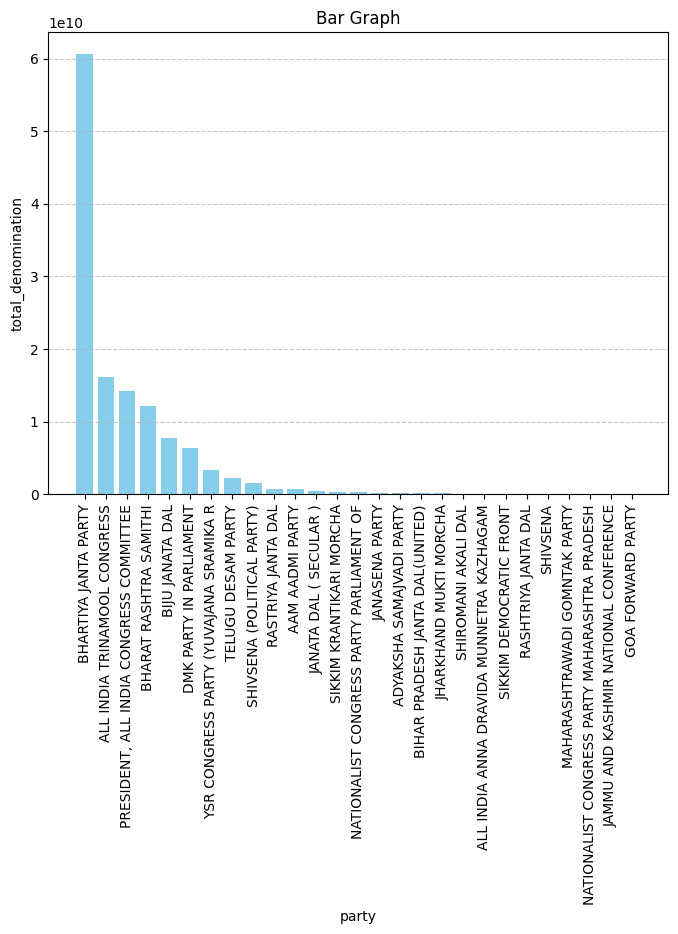

In [82]:
pandas_df = total_denomination_by_party.toPandas()
# pandas_df.plot(x='party', y='total_denomination', kind='bar', title='Line Graph')

import matplotlib.pyplot as plt

# Plotting a bar graph
plt.figure(figsize=(8, 6))  # Set the figure size
bars = plt.bar(pandas_df['party'], pandas_df['total_denomination'], color='skyblue')  # Plot the bars

plt.xlabel('party')  # Add x-axis label
plt.ylabel('total_denomination')  # Add y-axis label
plt.title('Bar Graph')  # Add title
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add horizontal grid lines
plt.xticks(rotation=90)
# Show the plot
plt.show()